Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Load the Dataset

In [34]:
df = pd.read_csv("/content/IMDb Movies India.csv",encoding=' latin-1')

df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


Data Preprocessing

In [9]:
df.drop(["Name"], axis=1, inplace=True)
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [11]:
numeric_df = df.select_dtypes(include=np.number)
df[numeric_df.columns] = df[numeric_df.columns].fillna(numeric_df.median())

In [19]:
label_enc = LabelEncoder()
df["Genre"] = label_enc.fit_transform(df["Genre"])
df["Director"] = label_enc.fit_transform(df["Director"])
df["Actor 1"] = label_enc.fit_transform(df["Actor 1"])
df["Actor 2"] = label_enc.fit_transform(df["Actor 2"])
df["Actor 3"] = label_enc.fit_transform(df["Actor 3"])

df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,299,NaN,NaN,1926,2250,800,3108
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,299,7.0,8,1548,3280,4790,527
2,#Homecoming,(2021),90 min,351,NaN,NaN,5123,3713,2866,3450
3,#Yaaram,(2019),110 min,228,4.4,35,3319,2917,1504,4020
4,...And Once Again,(2010),105 min,299,NaN,NaN,385,3112,3462,405


Split Data into Training and Testing Sets

In [20]:
X = df.drop("Rating", axis=1)
y = df["Rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scaling

In [33]:
non_numeric_cols = df.select_dtypes(exclude=np.number).columns.tolist()

from sklearn.preprocessing import LabelEncoder


encoders = {}

for col in non_numeric_cols:
    encoders[col] = LabelEncoder()
    combined_data = pd.concat([X_train[col], X_test[col]], ignore_index=True).astype(str)
    encoders[col].fit(combined_data)
    X_train[col] = encoders[col].transform(X_train[col].astype(str))
    X_test[col] = encoders[col].transform(X_test[col].astype(str))

Train the Machine Learning Model

In [29]:
y_train = y_train.dropna()
X_train = X_train.loc[y_train.index]

y_test = y_test.dropna()
X_test = X_test.loc[y_test.index]

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make Predictions

In [30]:
y_pred = model.predict(X_test)

Evaluate Model Performance

In [31]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 1.83
R-squared Score: 0.04


 Visualize Predictions

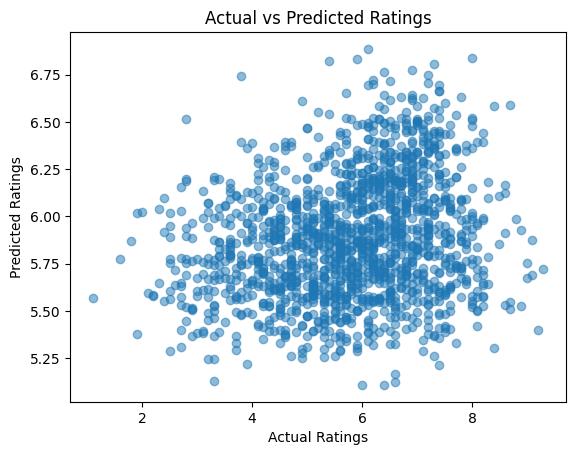

In [32]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()